In [2]:
import numpy as np
import re

In [4]:
data = """Machine learning, particularly deep learning, has become a powerful tool in analyzing and understanding complex data. Deep learning models, built on layers of interconnected neurons, are capable of identifying intricate patterns that traditional algorithms may miss. These models, which include convolutional neural networks for image processing and recurrent neural networks for sequential data, are widely applied in sectors such as healthcare, finance, and entertainment. From detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms, deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency."""
data

'Machine learning, particularly deep learning, has become a powerful tool in analyzing and understanding complex data. Deep learning models, built on layers of interconnected neurons, are capable of identifying intricate patterns that traditional algorithms may miss. These models, which include convolutional neural networks for image processing and recurrent neural networks for sequential data, are widely applied in sectors such as healthcare, finance, and entertainment. From detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms, deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency.'

In [6]:
sentences = data.split('.')
sentences

['Machine learning, particularly deep learning, has become a powerful tool in analyzing and understanding complex data',
 ' Deep learning models, built on layers of interconnected neurons, are capable of identifying intricate patterns that traditional algorithms may miss',
 ' These models, which include convolutional neural networks for image processing and recurrent neural networks for sequential data, are widely applied in sectors such as healthcare, finance, and entertainment',
 ' From detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms, deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency',
 '']

In [8]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['machine learning particularly deep learning has become a powerful tool in analyzing and understanding complex data',
 'deep learning models built on layers of interconnected neurons are capable of identifying intricate patterns that traditional algorithms may miss',
 'these models which include convolutional neural networks for image processing and recurrent neural networks for sequential data are widely applied in sectors such as healthcare finance and entertainment',
 'from detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency']

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[13, 2, 14, 4, 2, 15, 16, 17, 18, 19, 3, 20, 1, 21, 22, 5], [4, 2, 6, 23, 24, 25, 7, 26, 27, 8, 28, 7, 29, 30, 31, 32, 33, 34, 35, 36], [37, 6, 38, 39, 40, 9, 10, 11, 41, 42, 1, 43, 9, 10, 11, 44, 5, 8, 45, 46, 3, 47, 48, 49, 50, 51, 1, 52], [53, 54, 55, 3, 56, 57, 12, 58, 59, 60, 3, 61, 62, 4, 2, 63, 64, 65, 66, 67, 12, 5, 1, 68, 69, 70, 71, 1, 72]]


In [12]:
index_to_word = {}
word_to_index = {}
word2id = tokenizer.word_index

for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
  
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value
        
vocab_size = len(word2id)
print('Vocabulary Size:', vocab_size)
print(index_to_word, "\n")
print(word_to_index)

Vocabulary Size: 72
{13: 'machine', 2: 'learning', 14: 'particularly', 4: 'deep', 15: 'has', 16: 'become', 17: 'a', 18: 'powerful', 19: 'tool', 3: 'in', 20: 'analyzing', 1: 'and', 21: 'understanding', 22: 'complex', 5: 'data', 6: 'models', 23: 'built', 24: 'on', 25: 'layers', 7: 'of', 26: 'interconnected', 27: 'neurons', 8: 'are', 28: 'capable', 29: 'identifying', 30: 'intricate', 31: 'patterns', 32: 'that', 33: 'traditional', 34: 'algorithms', 35: 'may', 36: 'miss', 37: 'these', 38: 'which', 39: 'include', 40: 'convolutional', 9: 'neural', 10: 'networks', 11: 'for', 41: 'image', 42: 'processing', 43: 'recurrent', 44: 'sequential', 45: 'widely', 46: 'applied', 47: 'sectors', 48: 'such', 49: 'as', 50: 'healthcare', 51: 'finance', 52: 'entertainment', 53: 'from', 54: 'detecting', 55: 'anomalies', 56: 'medical', 57: 'imaging', 12: 'to', 58: 'enhancing', 59: 'personalized', 60: 'recommendations', 61: 'streaming', 62: 'platforms', 63: 'enables', 64: 'innovative', 65: 'solutions', 66: 'by', 

In [16]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[13, 2, 4, 2], [2, 14, 2, 15], [14, 4, 15, 16], [4, 2, 16, 17], [2, 15, 17, 18], [15, 16, 18, 19], [16, 17, 19, 3], [17, 18, 3, 20], [18, 19, 20, 1], [19, 3, 1, 21], [3, 20, 21, 22], [20, 1, 22, 5], [4, 2, 23, 24], [2, 6, 24, 25], [6, 23, 25, 7], [23, 24, 7, 26], [24, 25, 26, 27], [25, 7, 27, 8], [7, 26, 8, 28], [26, 27, 28, 7], [27, 8, 7, 29], [8, 28, 29, 30], [28, 7, 30, 31], [7, 29, 31, 32], [29, 30, 32, 33], [30, 31, 33, 34], [31, 32, 34, 35], [32, 33, 35, 36], [37, 6, 39, 40], [6, 38, 40, 9], [38, 39, 9, 10], [39, 40, 10, 11], [40, 9, 11, 41], [9, 10, 41, 42], [10, 11, 42, 1], [11, 41, 1, 43], [41, 42, 43, 9], [42, 1, 9, 10], [1, 43, 10, 11], [43, 9, 11, 44], [9, 10, 44, 5], [10, 11, 5, 8], [11, 44, 8, 45], [44, 5, 45, 46], [5, 8, 46, 3], [8, 45, 3, 47], [45, 46, 47, 48], [46, 3, 48, 49], [3, 47, 49, 50], [47, 48, 50, 51], [48, 49, 51, 1], [49, 50, 1, 52], [53, 54, 3, 56], [54, 55, 56, 57], [55, 3, 57, 12], [3, 56, 12, 58], [56, 57, 58, 59], [57, 12, 59, 60], [12, 58, 60, 3], [58

In [18]:
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['machine', 'learning', 'deep', 'learning']  ->  particularly
['learning', 'particularly', 'learning', 'has']  ->  deep
['particularly', 'deep', 'has', 'become']  ->  learning
['deep', 'learning', 'become', 'a']  ->  has
['learning', 'has', 'a', 'powerful']  ->  become


In [20]:
X = np.array(contexts)
Y = np.array(targets)

In [22]:
print(X)

[[13  2  4  2]
 [ 2 14  2 15]
 [14  4 15 16]
 [ 4  2 16 17]
 [ 2 15 17 18]
 [15 16 18 19]
 [16 17 19  3]
 [17 18  3 20]
 [18 19 20  1]
 [19  3  1 21]
 [ 3 20 21 22]
 [20  1 22  5]
 [ 4  2 23 24]
 [ 2  6 24 25]
 [ 6 23 25  7]
 [23 24  7 26]
 [24 25 26 27]
 [25  7 27  8]
 [ 7 26  8 28]
 [26 27 28  7]
 [27  8  7 29]
 [ 8 28 29 30]
 [28  7 30 31]
 [ 7 29 31 32]
 [29 30 32 33]
 [30 31 33 34]
 [31 32 34 35]
 [32 33 35 36]
 [37  6 39 40]
 [ 6 38 40  9]
 [38 39  9 10]
 [39 40 10 11]
 [40  9 11 41]
 [ 9 10 41 42]
 [10 11 42  1]
 [11 41  1 43]
 [41 42 43  9]
 [42  1  9 10]
 [ 1 43 10 11]
 [43  9 11 44]
 [ 9 10 44  5]
 [10 11  5  8]
 [11 44  8 45]
 [44  5 45 46]
 [ 5  8 46  3]
 [ 8 45  3 47]
 [45 46 47 48]
 [46  3 48 49]
 [ 3 47 49 50]
 [47 48 50 51]
 [48 49 51  1]
 [49 50  1 52]
 [53 54  3 56]
 [54 55 56 57]
 [55  3 57 12]
 [ 3 56 12 58]
 [56 57 58 59]
 [57 12 59 60]
 [12 58 60  3]
 [58 59  3 61]
 [59 60 61 62]
 [60  3 62  4]
 [ 3 61  4  2]
 [61 62  2 63]
 [62  4 63 64]
 [ 4  2 64 65]
 [ 2 63 65

In [24]:
print(Y)

[14  4  2 15 16 17 18 19  3 20  1 21  6 23 24 25  7 26 27  8 28  7 29 30
 31 32 33 34 38 39 40  9 10 11 41 42  1 43  9 10 11 44  5  8 45 46  3 47
 48 49 50 51 55  3 56 57 12 58 59 60  3 61 62  4  2 63 64 65 66 67 12  5
  1 68 69 70 71]


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [28]:

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0000e+00 - loss: 4.2910
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1092 - loss: 4.2845
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0676 - loss: 4.2779
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0754 - loss: 4.2700 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0754 - loss: 4.2588 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0676 - loss: 4.2466
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0572 - loss: 4.2314
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0650 - loss: 4.2015
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0494 - loss: 4.1740
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0559 - loss: 4.1304
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0911 - loss: 4.0744
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0520 - loss: 4.0346   
Ep

<Axes: >

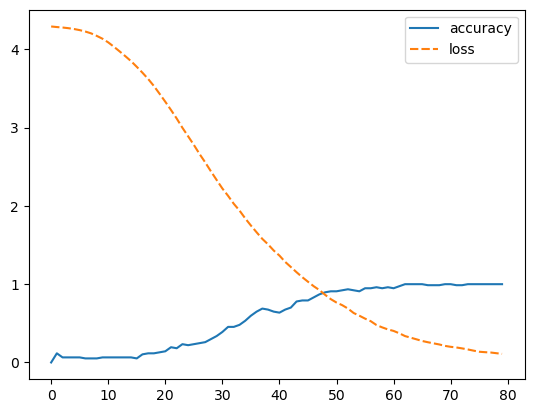

In [34]:
import seaborn as sns
sns.lineplot(model.history.history)

In [36]:
print("""Machine learning, particularly deep learning, has become a powerful tool in analyzing and understanding complex data. Deep learning models, built on layers of interconnected neurons, are capable of identifying intricate patterns that traditional algorithms may miss. These models, which include convolutional neural networks for image processing and recurrent neural networks for sequential data, are widely applied in sectors such as healthcare, finance, and entertainment. From detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms, deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency.""")

Machine learning, particularly deep learning, has become a powerful tool in analyzing and understanding complex data. Deep learning models, built on layers of interconnected neurons, are capable of identifying intricate patterns that traditional algorithms may miss. These models, which include convolutional neural networks for image processing and recurrent neural networks for sequential data, are widely applied in sectors such as healthcare, finance, and entertainment. From detecting anomalies in medical imaging to enhancing personalized recommendations in streaming platforms, deep learning enables innovative solutions by adapting to data and continuously improving its accuracy and efficiency.


In [38]:
test_sentenses = [
    "particularly learning"
]

In [40]:
for sent in test_sentenses:
    test_words = sent.split(" ")
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])   
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
pred  ['particularly', 'learning'] 
= deep 


